In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import datasets, decomposition


def digits_plot():
    digits = datasets.load_digits(n_class=6)
    n_digits = 500
    X = digits.data[:n_digits]
    y = digits.target[:n_digits]
    n_samples, n_features = X.shape

    def plot_embedding(X, title=None):
        x_min, x_max = np.min(X, 0), np.max(X, 0)
        X = (X - x_min) / (x_max - x_min)

        plt.figure()
        ax = plt.subplot(111)
        for i in range(X.shape[0]):
            plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                     color=plt.cm.Set1(y[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})

        if hasattr(offsetbox, 'AnnotationBbox'):
            # only print thumbnails with matplotlib > 1.0
            shown_images = np.array([[1., 1.]])  # just something big
            for i in range(X.shape[0]):
                dist = np.sum((X[i] - shown_images) ** 2, 1)
                if np.min(dist) < 1e5:
                    # don't show points that are too close
                    # set a high threshold to basically turn this off
                    continue
                shown_images = np.r_[shown_images, [X[i]]]
                imagebox = offsetbox.AnnotationBbox(
                    offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                    X[i])
                ax.add_artist(imagebox)
        plt.xticks([]), plt.yticks([])
        if title is not None:
            plt.title(title)

    n_img_per_row = 10
    img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
    for i in range(n_img_per_row):
        ix = 10 * i + 1
        for j in range(n_img_per_row):
            iy = 10 * j + 1
            img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

    plt.imshow(img, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title('Una selección de dígitos del dataset')
    print("Obteniendo la proyección PCA")
    pca = decomposition.PCA(n_components=2).fit(X)
    X_pca = pca.transform(X)
    plot_embedding(X_pca, "Proyección de las dos componentes principales de los dígitos")
    plt.show()
    plt.imshow(pca.components_[0, :].reshape(8, 8), cmap="gray")
    plt.title("Primera componente principal")
    plt.axis('off')
    plt.show()
    plt.imshow(pca.components_[1, :].reshape(8, 8), cmap="gray")
    plt.title("Segunda componente principal")
    plt.axis('off')
    plt.show()

In [120]:
from matplotlib.colors import ListedColormap

cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split


def plot_scaling():
    X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
    X += 3

    plt.figure(figsize=(15, 8))
    main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

    main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=60)
    maxx = np.abs(X[:, 0]).max()
    maxy = np.abs(X[:, 1]).max()

    main_ax.set_xlim(-maxx + 1, maxx + 1)
    main_ax.set_ylim(-maxy + 1, maxy + 1)
    main_ax.set_title("Datos originales")
    other_axes = [plt.subplot2grid((2, 4), (i, j)) for j in range(2, 4) for i in range(2)]

    for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                       MinMaxScaler(), Normalizer(norm='l2')]):
        X_ = scaler.fit_transform(X)
        ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cm2, s=60)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_title(type(scaler).__name__)

    other_axes.append(main_ax)

    for ax in other_axes:
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')


def plot_relative_scaling():
    # make synthetic data
    X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
    # split it into training and test set
    X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
    # plot the training and test set
    fig, axes = plt.subplots(1, 3, figsize=(13, 4))
    axes[0].scatter(X_train[:, 0], X_train[:, 1],
                    c='b', label="conjunto de entrenamiento", s=60)
    axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                    c='r', label="conjunto de test", s=60)
    axes[0].legend(loc='upper left')
    axes[0].set_title("datos originales")

    # scale the data using MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # visualize the properly scaled data
    axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                    c='b', label="conjunto de entrenamiento", s=60)
    axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                    c='r', label="conjunto de test", s=60)
    axes[1].set_title("datos escalados")

    # rescale the test set separately, so that test set min is 0 and test set max is 1
    # DO NOT DO THIS! For illustration purposes only
    test_scaler = MinMaxScaler()
    test_scaler.fit(X_test)
    X_test_scaled_badly = test_scaler.transform(X_test)

    # visualize wrongly scaled data
    axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                    c='b', label="conjunto de entrenamiento", s=60)
    axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
                    c='r', label="conjunto de test", s=60)
    axes[2].set_title("datos incorrectamente escalados")


In [122]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


def plot_pca_illustration():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA()
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    S = X_pca.std(axis=0)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("Datos originales")
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[0].set_xlabel("característica 1")
    axes[0].set_ylabel("característica 2")
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].text(-1.5, -.5, "Componente 2", size=14)
    axes[0].text(-4, -4, "Componente 1", size=14)
    axes[0].set_aspect('equal')

    axes[1].set_title("Datos transformados")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[1].set_xlabel("Primera componente principal")
    axes[1].set_ylabel("Segunda componente principal")
    axes[1].set_aspect('equal')
    axes[1].set_ylim(-8, 8)

    pca = PCA(n_components=1)
    pca.fit(X_blob)
    X_inverse = pca.inverse_transform(pca.transform(X_blob))

    axes[2].set_title("Datos transformados sin la segunda componente")
    axes[2].scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[2].set_xlabel("Primera componente principal")
    axes[2].set_aspect('equal')
    axes[2].set_ylim(-8, 8)

    axes[3].set_title("Recuperación de los datos con una componente")
    axes[3].scatter(X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[3].set_xlabel("característica 1")
    axes[3].set_ylabel("característica 2")
    axes[3].set_aspect('equal')
    axes[3].set_xlim(-8, 4)
    axes[3].set_ylim(-8, 4)


def plot_pca_whitening():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA(whiten=True)
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("Datos originales")
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[0].set_xlabel("Característica 1")
    axes[0].set_ylabel("Característica 2")
    axes[0].set_aspect('equal')

    axes[1].set_title("Datos limpiados")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[1].set_xlabel("Primera componente principal")
    axes[1].set_ylabel("Segunda componente principal")
    axes[1].set_aspect('equal')
    axes[1].set_xlim(-3, 4)

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Aprendizaje no supervisado parte 1 - transformación


Muchas formas de aprendizaje no supervisado, como reducción de dimensionalidad, aprendizaje de variedades y extracción de características, encuentran una nueva representación de los datos de entrada sin ninguna variable adicional (al contrario que en aprendizaje supervisado, los algoritmos no supervisados no requieren o consideran variables objetivo como en los casos anteriores de clasificación y regresión).

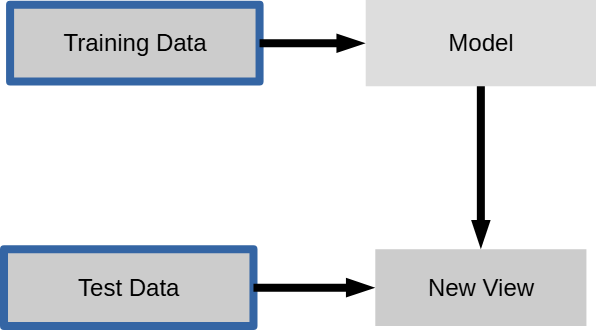

Un ejemplo muy básico es el rescalado de los datos, que es un requisito para muchos algoritmos de aprendizaje automático ya que no son invariantes a escala (aunque el reescalado de los datos es más bien un método de preprocesamiento ya que no hay mucho *aprendizaje*). Existen muchas técnicas de reescalado y, en el siguiente ejemplo, veremos un método particular que se denomina "estandarización". Con este método, reescalaremos los datos para que cada característica esté centrada en el cero (media=0) con varianza unitaria (desviación típica = 1).

Por ejemplo, si tenemos un dataset de una dimensión con los datos $[1, 2, 3, 4, 5]$, los valores estandarizados serían:

- 1 -> -1.41
- 2 -> -0.71
- 3 -> 0.0
- 4 -> 0.71
- 5 -> 1.41

los cuales se pueden obtener con la ecuación $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$, donde $\mu$ es la media muestral, y $\sigma$ la desviación típica.

In [124]:
ary = np.array([1, 2, 3, 4, 5])
ary_standardized = (ary - ary.mean()) / ary.std()
ary_standardized

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

Aunque la estandarización es un método muy básico (y su código es simple, como acabamos de ver) scikit-learn implemente una clase `StandardScaler` para realizar los cálculos. En secciones posteriores veremos porqué es mejor usar la interfaz de scikit-learn que el código anterior.

Aplicar un algoritmo de preprocesamiento tiene una interfaz muy similar a la que se usa para los algoritmos supervisados que hemos visto hasta el momento. Para coger más práctica con la interfaz ``Transformer`` de scikit-learn, vamos a empezar cargando el dataset iris y reescalándolo:


In [125]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape)

(112, 4)


El dataset iris no está "centrado", es decir, tiene media distinta de cero y desviación típica distinta para cada componente:


In [126]:
print("media : %s " % X_train.mean(axis=0))
print("desviacion típica : %s " % X_train.std(axis=0))

media : [5.88660714 3.05178571 3.79642857 1.22321429] 
desviacion típica : [0.86741565 0.43424445 1.79264014 0.77793019] 


Para usar un método de preprocesamiento, primero importamos el estimador, en este caso, ``StandardScaler``, y luego lo instanciamos:
    

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Como con los algoritmos de regresión y clasificación, llamamos a ``fit`` para aprender el modelo de los datos. Como es un modelo no supervisado, solo le pasamos ``X``, no ``y``. Esto simplemente calcula la media y la desviación típica.

In [128]:
scaler.fit(X_train)
print(scaler.mean_)
print(scaler.scale_)

[5.88660714 3.05178571 3.79642857 1.22321429]
[0.86741565 0.43424445 1.79264014 0.77793019]


Ahora podemos reescalar los datos aplicando el método ``transform`` (no ``predict``):

In [129]:
X_train_scaled = scaler.transform(X_train)

``X_train_scaled`` tiene el mismo número de ejemplos y características, pero la media ha sido restada y todos las variables tienen desviación típica unitaria:

In [130]:
print(X_train_scaled.shape)

(112, 4)


In [131]:
print("media : %s " % X_train_scaled.mean(axis=0))
print("desviación típica : %s " % X_train_scaled.std(axis=0))

media : [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17 -3.66770106e-16] 
desviación típica : [1. 1. 1. 1.] 


Resumiendo, el método `fit` ajusta el estimador a los datos que le proporcionamos. En este paso, el estimador estima los parámetros de los datos (p.ej. media y desviación típica). Después, si aplicamos `transform`, estos parámetros se utilizan para transformar un dataset (**el método `transform` no modifica los parámetros**).

Es importante indicar que la misma transformación se utiliza para los datos de entrenamiento y de test. Como consecuencia, la media y desviación típica en test no tienen porque ser 0 y 1:

In [132]:
X_test_scaled = scaler.transform(X_test)
print("medias de los datos de test: %s" % X_test_scaled.mean(axis=0))

medias de los datos de test: [-0.19692712  0.05042896 -0.08461917 -0.12117658]


La transformación en entrenamiento y test debe ser siempre la misma, para que tenga sentido lo que estamos haciendo. Por ejemplo:

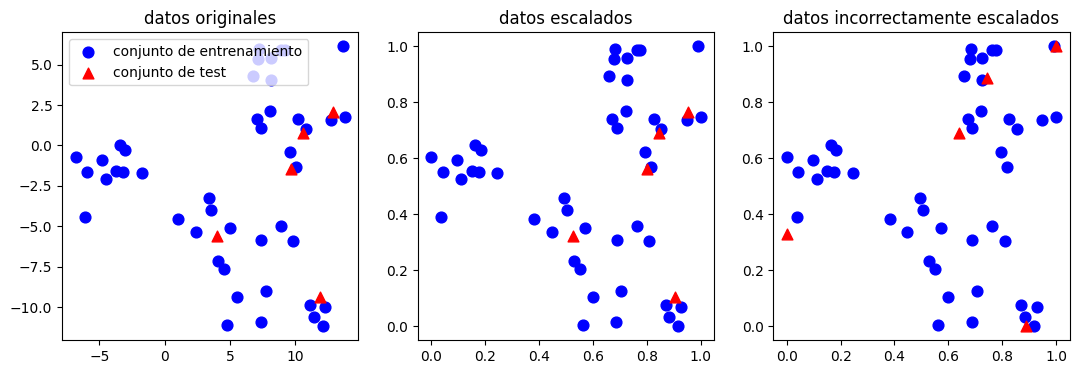

In [133]:

plot_relative_scaling()

Hay muchas formas de escalar los datos. La más común es el ``StandardScaler`` que hemos mencionada, pero hay otras clases útiles como:
- ``MinMaxScaler``: reescalar los datos para que se ajusten a un mínimo y un máximo (normalmente, entre 0 y 1)
- ``RobustScaler``: utilizar otros estadísticos más robustos como la mediana o los cuartiles, en lugar de la media y la desviación típica.
- ``Normalizer``: normaliza cada ejemplo individualmente para que tengan como norma (L1 o L2) la unidad. Por defecto, se utiliza L2.

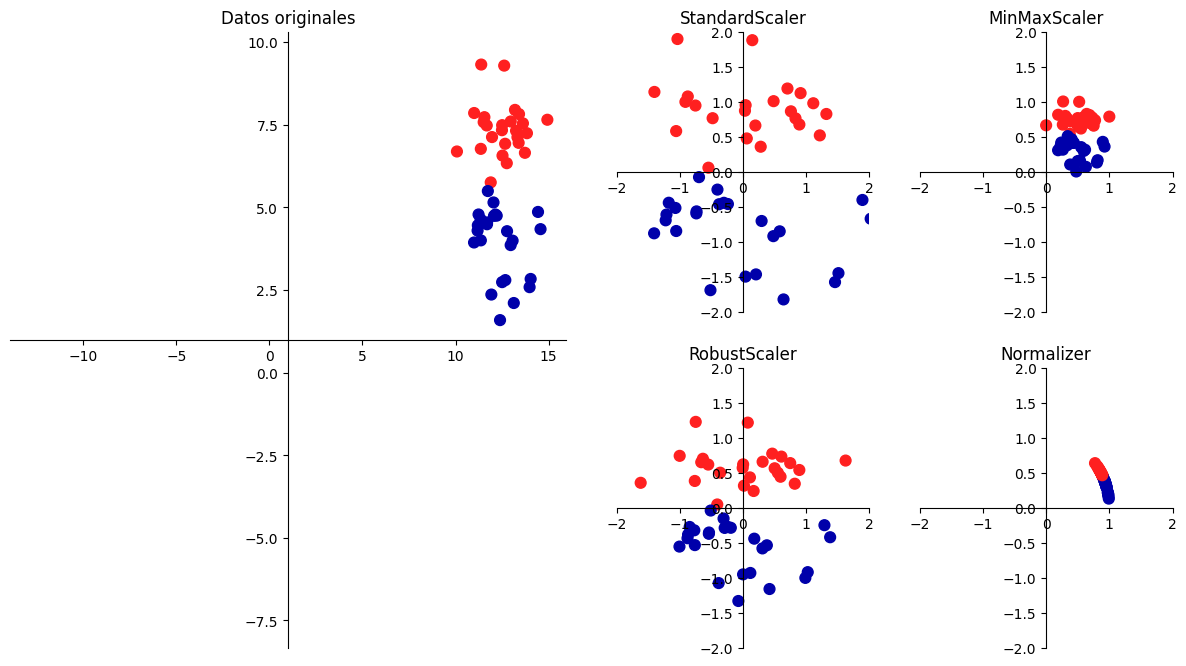

In [134]:

plot_scaling()

Análisis de componentes principales
============================

Una transformación no supervisada algo más interesante es el Análisis de Componentes Principales (*Principal Component Analysis*, PCA). Es una técnica para reducir la dimensionalidad de los datos, creando una proyección lineal. Es decir, encontramos características nuevas para representar los datos que son una combinación lineal de los datos originales (lo cual es equivalente a rotar los datos). De esta forma, podemos pensar en el PCA como una proyección de nuestros datos en un *nuevo* espacio de características.

La forma en que el PCA encuentra estas nuevas direcciones es buscando direcciones de máxima varianza. Normalmente, solo unas pocas componentes principales son capaces explicar la mayor parte de la varianza y el resto se pueden obviar. La premisa es reducir el tamaño (dimensionalidad) del dataset, al mismo tiempo que se captura la mayor parte de información. Hay muchas razones por las que es bueno reducir la dimensionalidad de un dataset: reducimos el coste computacional de los algoritmos de aprendizaje, reducimos el espacio en disco y ayudamos a combatir la llamada *maldición de la dimensionalidad* (*curse of dimensionality*), que discutiremos después más a fondo.

Para ilustrar como puede funcionar una rotación, primero la mostraremos en datos bidimensionales y mantendremos las dos componentes principales:


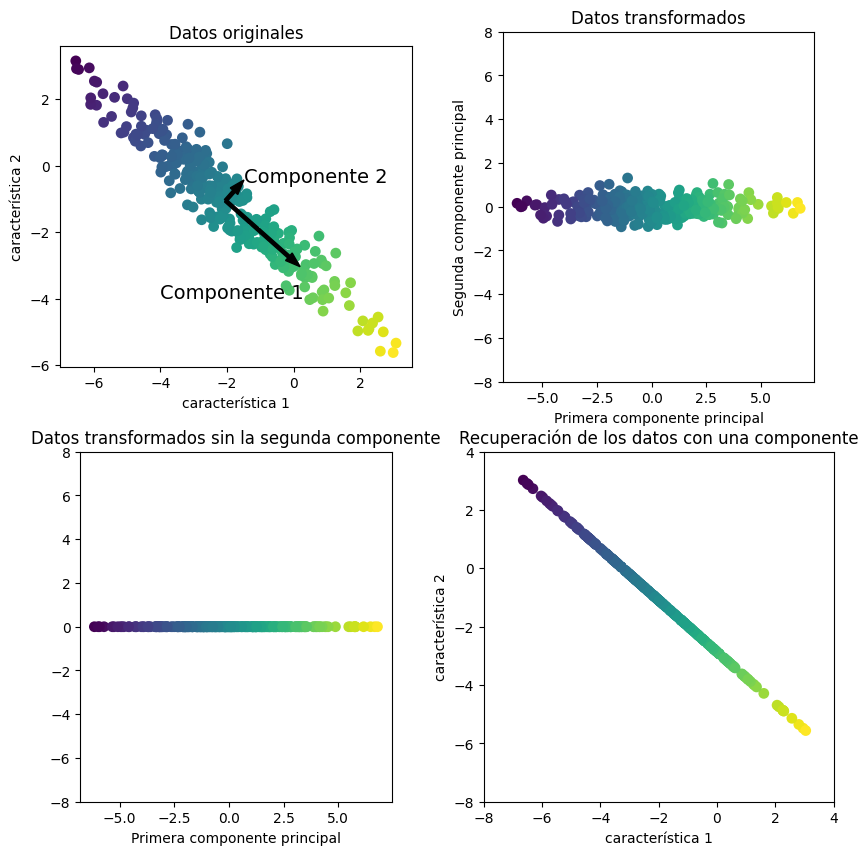

In [135]:
plot_pca_illustration()

Veamos ahora todos los pasos con más detalle.
Creamos una nube Gaussiana de puntos, que es rotada:

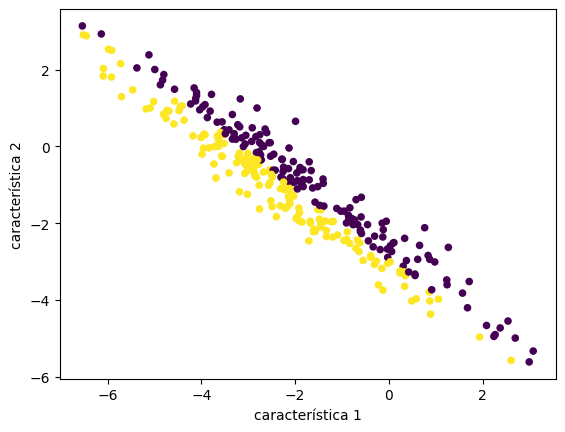

In [136]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2)))+rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("característica 1")
plt.ylabel("característica 2");

Como siempre, instanciamos nuestro modelo PCA. Por defecto, todas las componentes se mantienen:

In [137]:
from sklearn.decomposition import PCA
pca = PCA()

Después, ajustamos el PCA a los datos. Como PCA es un algoritmo no supervisado, no hay que suministrar ninguna ``y``.

In [138]:
pca.fit(X_blob)

PCA()

Después podemos transformar los datos, proyectando en las componentes principales:

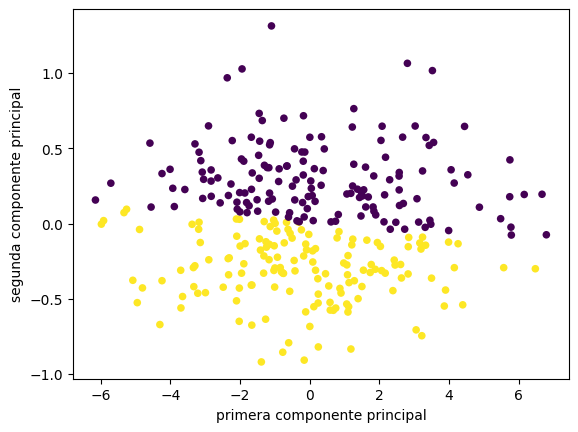

In [139]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("primera componente principal")
plt.ylabel("segunda componente principal");

Ahora vamos a usar una sola componente principal

In [140]:
pca = PCA(n_components=1).fit(X_blob)

In [141]:
X_blob.shape

(300, 2)

In [142]:
X_pca = pca.transform(X_blob)
print(X_pca.shape)

(300, 1)


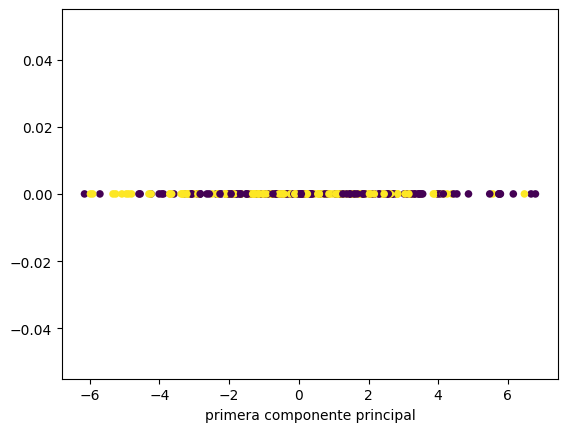

In [143]:
plt.scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=y, linewidths=0, s=30)
plt.xlabel("primera componente principal");

El PCA encuentra sitúa la primera componente en la diagonal de los datos (máxima variabilidad) y la segunda perpendicular a la primera. Las componentes siempre son ortogonales entre si.

Reducción de la dimensionalidad para visualización con PCA
-------------------------------------------------------------
Considera el dataset de dígitos. No puede ser visualizado en un único gráfico 2D, porque tiene 64 características. Vamos a extraer 2 dimensiones para visualizarlo, utilizando este [ejemplo](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html) de scikit learn.

Obteniendo la proyección PCA


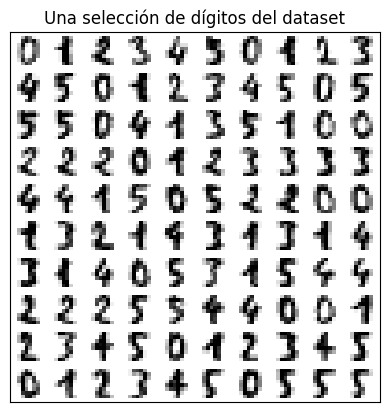

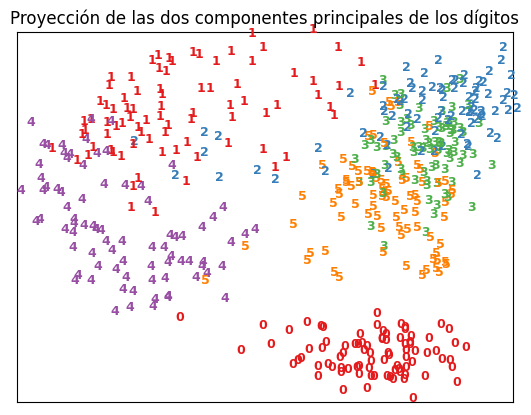

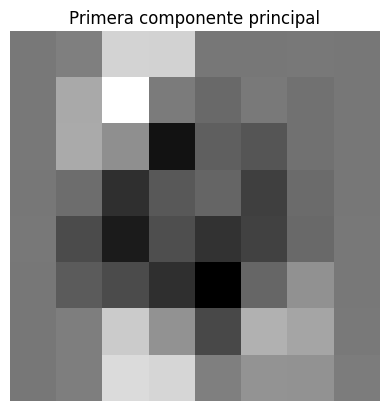

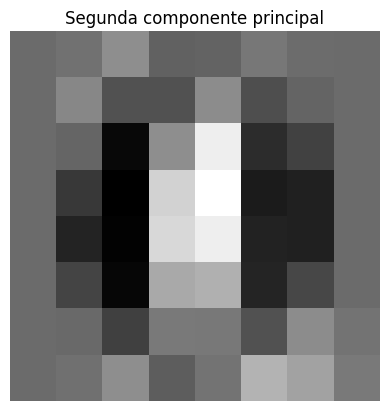

In [144]:
digits_plot()

Ten en cuenta que esta proyección se determinó *sin* ninguna información sobre las etiquetas (representadas por colores): en este sentido, este aprendizaje es **no supervisado**.  No obstante, vemos que la proyección nos da pistas sobre la distribución de los dígitos en el espacio de características.

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
        Visualizar el dataset iris utilizando las dos primeras componentes principales y comparar a la visualización utilizando dos de las características originales.
      </li>
    </ul>
</div>

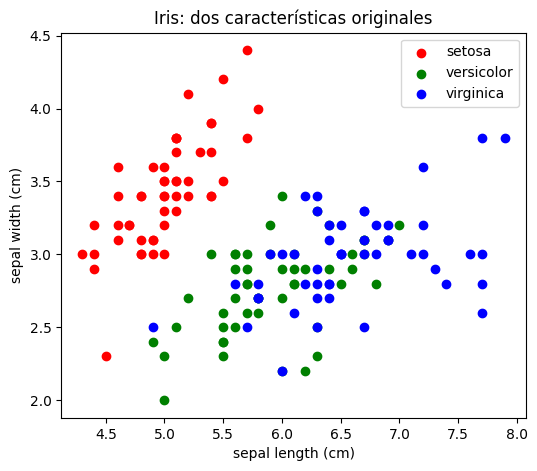

Varianza explicada por cada componente principal:
Componente 1: 0.92 (92.5%)
Componente 2: 0.05 (5.3%)


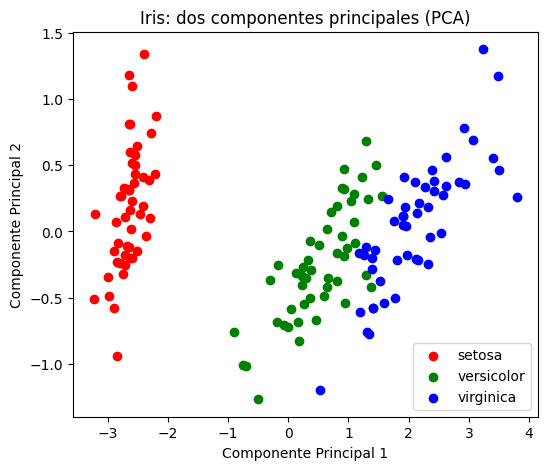

In [145]:
# =========================================
# EJEMPLO: Visualización del dataset Iris
# usando características originales vs PCA
# =========================================

# 1️⃣ Importar librerías necesarias
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 2️⃣ Cargar dataset Iris
iris = load_iris()
X = iris.data        # Las 4 características: sepal/petal length/width
y = iris.target      # Clases: 0 (setosa), 1 (versicolor), 2 (virginica)
feature_names = iris.feature_names
target_names = iris.target_names

# =========================================
# 3️⃣ Visualización usando 2 características originales
# =========================================

# 💡 Explicación:
# Elegimos solo 2 características para poder hacer una visualización en 2D,
# ya que no podemos graficar directamente en 4D.
# Elegimos "sepal length" y "sepal width" porque son las primeras dos características
# del dataset y son intuitivas para mostrar diferencias entre clases.
plt.figure(figsize=(6,5))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], target_names):
    # Seleccionamos la columna 0 y 1: sepal length y sepal width
    plt.scatter(X[y==target, 0], X[y==target, 1], c=color, label=label)

plt.xlabel(feature_names[0])  # sepal length
plt.ylabel(feature_names[1])  # sepal width
plt.title("Iris: dos características originales")
plt.legend()
plt.show()

# =========================================
# 4️⃣ Aplicar PCA y reducir a 2 dimensiones
# =========================================

# 💡 Explicación:
# Usamos PCA para reducir las 4 dimensiones originales a 2 componentes principales.
# Esto nos permite graficar los datos en 2D pero conservando la mayor parte de la varianza.
pca = PCA(n_components=2)   # Queremos 2 componentes principales
X_pca = pca.fit_transform(X) # Ajustamos PCA y transformamos los datos

# Mostrar cuánta varianza explica cada componente
print("Varianza explicada por cada componente principal:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.2f} ({var*100:.1f}%)")

# =========================================
# 5️⃣ Visualización usando las 2 componentes principales
# =========================================

plt.figure(figsize=(6,5))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], target_names):
    plt.scatter(X_pca[y==target, 0], X_pca[y==target, 1], c=color, label=label)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Iris: dos componentes principales (PCA)")
plt.legend()
plt.show()

# 💡 Conclusión:
# - Elegimos 2 dimensiones para poder graficar en 2D.
# - Elegimos sepal_length y sepal_width para la visualización original
#   por simplicidad y porque permiten ver cierta separación entre clases.
# - PCA permite usar toda la información de las 4 características para
#   crear una representación 2D más representativa de la estructura del dataset.


In [146]:
# Cada fila = una componente principal
# Cada columna = el peso de cada característica original
print("Matriz de componentes principales:")
print(pca.components_)

# Mejor: mostrarlo con nombres de características
for i, component in enumerate(pca.components_):
    print(f"\nComponente Principal {i+1}:")
    for feature, weight in zip(feature_names, component):
        print(f"{feature}: {weight:.3f}")

Matriz de componentes principales:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

Componente Principal 1:
sepal length (cm): 0.361
sepal width (cm): -0.085
petal length (cm): 0.857
petal width (cm): 0.358

Componente Principal 2:
sepal length (cm): 0.657
sepal width (cm): 0.730
petal length (cm): -0.173
petal width (cm): -0.075


Encontrar el número ideal de componentes en PCA es un paso clave para mantener suficiente información sin usar dimensiones innecesarias. Vamos a verlo paso a paso para Digits.

Varianza explicada por cada componente: [0.12  0.097 0.083 0.067 0.049 0.043 0.039 0.033 0.03  0.028 0.028 0.025
 0.023 0.022 0.019 0.018 0.017 0.016 0.016 0.015 0.013 0.013 0.012 0.012
 0.01  0.01  0.009 0.009 0.008 0.008 0.007 0.007 0.007 0.006 0.006 0.006
 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.   ]
Varianza acumulada: [0.12  0.217 0.3   0.367 0.416 0.459 0.498 0.532 0.562 0.59  0.618 0.643
 0.665 0.688 0.707 0.725 0.743 0.759 0.775 0.79  0.803 0.816 0.829 0.84
 0.85  0.86  0.869 0.877 0.886 0.893 0.901 0.908 0.914 0.921 0.927 0.933
 0.938 0.943 0.947 0.952 0.956 0.96  0.963 0.967 0.97  0.973 0.976 0.978
 0.981 0.983 0.985 0.987 0.989 0.991 0.993 0.994 0.996 0.997 0.998 0.999
 1.    1.    1.    1.   ]


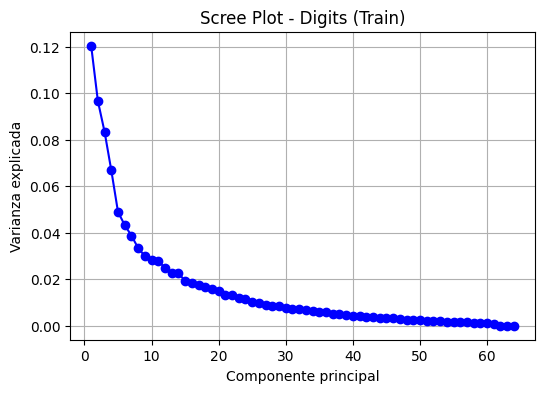

Número de componentes para 95% varianza: 40


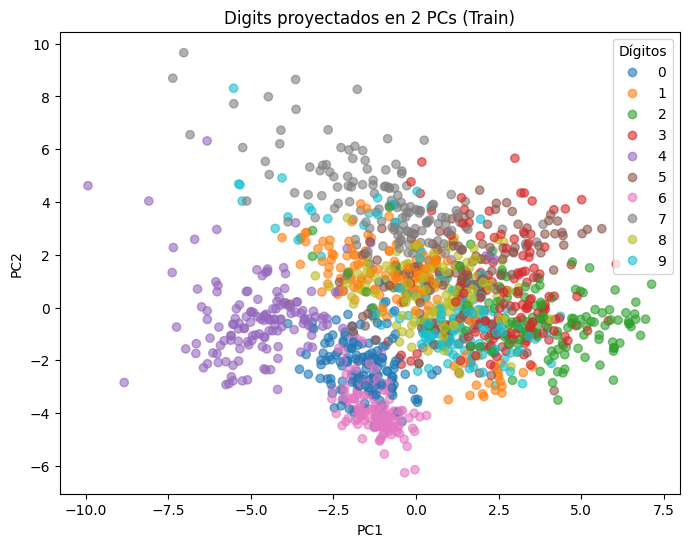

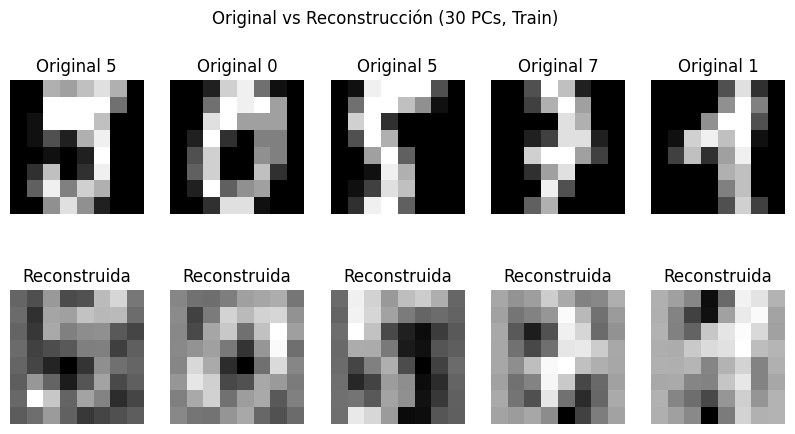

In [161]:
# 1 Importar librerías
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 2 Cargar dataset
digits = load_digits()
X = digits.data      # 64 características (8x8 píxeles)
y = digits.target    # dígitos 0-9

# 3 División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4 Estandarizar (fit SOLO en train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5 Ajustar PCA completo (solo train)
pca = PCA()
pca.fit(X_train_scaled)

# 6 Varianza explicada y acumulada
var_ratio = pca.explained_variance_ratio_
var_acum = np.cumsum(var_ratio)

print("Varianza explicada por cada componente:", np.round(var_ratio, 3))
print("Varianza acumulada:", np.round(var_acum, 3))

# 7 Scree plot
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(var_ratio)+1), var_ratio, 'o-', color='blue')
plt.xlabel("Componente principal")
plt.ylabel("Varianza explicada")
plt.title("Scree Plot - Digits (Train)")
plt.grid(True)
plt.show()

# 8 Selección automática de componentes (95% varianza)
pca95 = PCA(n_components=0.95)
X_train_pca95 = pca95.fit_transform(X_train_scaled)
X_test_pca95 = pca95.transform(X_test_scaled)

print("Número de componentes para 95% varianza:", X_train_pca95.shape[1])

# 9 Visualización en 2D (exploratoria, usando train)
pca2 = PCA(n_components=2)
X_train_pca2 = pca2.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_train_pca2[:,0],
    X_train_pca2[:,1],
    c=y_train,
    cmap='tab10',
    alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits proyectados en 2 PCs (Train)")
plt.legend(*scatter.legend_elements(), title="Dígitos")
plt.show()

# 10 Reconstrucción aproximada con 30 componentes (train)
pca30 = PCA(n_components=30)
X_train_pca30 = pca30.fit_transform(X_train_scaled)
X_train_reconstructed = pca30.inverse_transform(X_train_pca30)

# Mostrar originales vs reconstruidas
fig, axes = plt.subplots(2, 5, figsize=(10,5))
for i in range(5):
    axes[0,i].imshow(X_train[i].reshape(8,8), cmap='gray')
    axes[0,i].set_title(f"Original {y_train[i]}")
    axes[0,i].axis('off')

    axes[1,i].imshow(X_train_reconstructed[i].reshape(8,8), cmap='gray')
    axes[1,i].set_title("Reconstruida")
    axes[1,i].axis('off')

plt.suptitle("Original vs Reconstrucción (30 PCs, Train)")
plt.show()



Varianza acumulada con 30 componentes: 0.893
Error de reconstrucción (MSE) con 30 componentes: 0.102


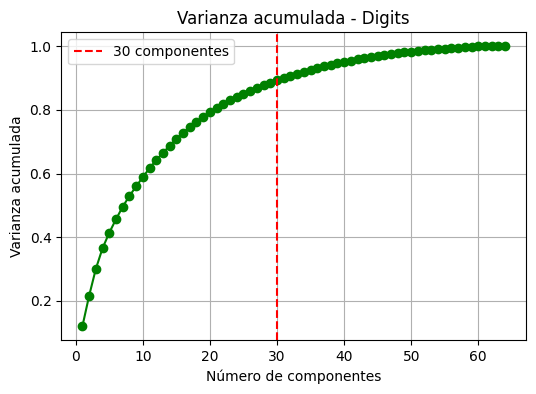

In [148]:
# 10 Valorar el rendimiento del PCA

from sklearn.metrics import mean_squared_error

# a) Varianza acumulada para 30 componentes
pca30_var_ratio = pca30.explained_variance_ratio_
pca30_var_acum = np.cumsum(pca30_var_ratio)
print("Varianza acumulada con 30 componentes:", np.round(pca30_var_acum[-1], 3))

# b) Error de reconstrucción
mse = mean_squared_error(X_scaled, X_reconstructed)
print("Error de reconstrucción (MSE) con 30 componentes:", np.round(mse, 3))

# c) Visualización: varianza explicada acumulada (opcional)
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,len(var_ratio)+1), var_acum, 'o-', color='green')
plt.axvline(x=30, color='red', linestyle='--', label="30 componentes")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Varianza acumulada - Digits")
plt.legend()
plt.grid(True)
plt.show()


In [164]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)
var_ratio = pca.explained_variance_ratio_
var_acum = np.cumsum(var_ratio)

print("Varianza explicada por cada componente:", np.round(var_ratio, 3))
print("Varianza acumulada:", np.round(var_acum, 3))


pca95 = PCA(n_components=0.95)
X_pca95 = pca95.fit_transform(X_train_scaled)
num_componentes=X_pca95.shape[1]
print("Número de componentes seleccionadas para 95% varianza:", num_componentes)

pca = PCA(n_components=num_componentes)
X_pca_optimizado=pca.fit_transform(X_train_scaled)

var_ratio = pca.explained_variance_ratio_
var_acum = np.cumsum(var_ratio)

print("Varianza explicada por cada componente:", np.round(var_ratio, 3))
print("Varianza acumulada:", np.round(var_acum, 3))



Varianza explicada por cada componente: [0.722 0.241 0.032 0.004]
Varianza acumulada: [0.722 0.963 0.996 1.   ]
Número de componentes seleccionadas para 95% varianza: 2
Varianza explicada por cada componente: [0.722 0.241]
Varianza acumulada: [0.722 0.963]


# 1 Importar librerías
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 2 Cargar dataset
digits = load_digits()
X = digits.data      # 64 características (8x8 píxeles)
y = digits.target    # dígitos 0-9

# 3 División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4 Estandarizar (fit SOLO en train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5 Ajustar PCA completo (solo train)
pca = PCA()
pca.fit(X_train_scaled)

# 6 Varianza explicada y acumulada
var_ratio = pca.explained_variance_ratio_
var_acum = np.cumsum(var_ratio)

print("Varianza explicada por cada componente:", np.round(var_ratio, 3))
print("Varianza acumulada:", np.round(var_acum, 3))

# 7 Scree plot
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(var_ratio)+1), var_ratio, 'o-', color='blue')
plt.xlabel("Componente principal")
plt.ylabel("Varianza explicada")
plt.title("Scree Plot - Digits (Train)")
plt.grid(True)
plt.show()

# 8 Selección automática de componentes (95% varianza)
pca95 = PCA(n_components=0.95)
X_train_pca95 = pca95.fit_transform(X_train_scaled)
X_test_pca95 = pca95.transform(X_test_scaled)

print("Número de componentes para 95% varianza:", X_train_pca95.shape[1])

# 9 Visualización en 2D (exploratoria, usando train)
pca2 = PCA(n_components=2)
X_train_pca2 = pca2.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_train_pca2[:,0],
    X_train_pca2[:,1],
    c=y_train,
    cmap='tab10',
    alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits proyectados en 2 PCs (Train)")
plt.legend(*scatter.legend_elements(), title="Dígitos")
plt.show()

# 10 Reconstrucción aproximada con 30 componentes (train)
pca30 = PCA(n_components=30)
X_train_pca30 = pca30.fit_transform(X_train_scaled)
X_train_reconstructed = pca30.inverse_transform(X_train_pca30)

# Mostrar originales vs reconstruidas
fig, axes = plt.subplots(2, 5, figsize=(10,5))
for i in range(5):
    axes[0,i].imshow(X_train[i].reshape(8,8), cmap='gray')
    axes[0,i].set_title(f"Original {y_train[i]}")
    axes[0,i].axis('off')

    axes[1,i].imshow(X_train_reconstructed[i].reshape(8,8), cmap='gray')
    axes[1,i].set_title("Reconstruida")
    axes[1,i].axis('off')

plt.suptitle("Original vs Reconstrucción (30 PCs, Train)")
plt.show()

